In [7]:
import skimage.data
# Reading the image
img = skimage.data.chelsea()
# Converting the image into gray.
img = skimage.color.rgb2gray(img)

In [8]:
import numpy as numpy
l1_filter = numpy.zeros((1,3,3)) #(1=num_filters, 3=num_rows_filter, 3=num_columns_filter)

In [9]:
# simple box blur

l1_filter[0, :, :] = numpy.array([[[1/9, 1/9, 1/9],
                                   [1/9, 1/9, 1/9],
                                   [1/9, 1/9, 1/9]]])


In [10]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result

In [11]:
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.

In [12]:
l1_feature_map = conv(img, l1_filter)

Filter  1


In [13]:
l1_feature_map.shape

(298, 449, 1)

In [14]:
l1_feature_map=l1_feature_map.reshape(298,449)

In [9]:
l1_feature_map.shape

(298, 449)

In [10]:
img.shape

(300, 451)

In [11]:
import matplotlib
fig0, ax0 = matplotlib.pyplot.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
matplotlib.pyplot.savefig("input_img.png", bbox_inches="tight")
matplotlib.pyplot.close(fig0)

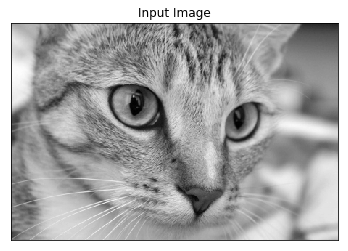

In [12]:
from IPython.display import Image
Image("input_img.png")

In [15]:
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=1)
ax1.imshow(l1_feature_map).set_cmap("gray")
ax1.set_title("Input Image")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
matplotlib.pyplot.savefig("filtered.png", bbox_inches="tight")
matplotlib.pyplot.close(fig1)

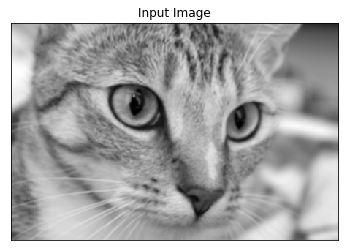

In [16]:
Image("filtered.png")